<a href="https://colab.research.google.com/github/kieunseo/Regression/blob/main/Wine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. wine file load 읽기



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data/wine.csv', encoding = "utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
display(df) #하단이 아니어도 출력 가능함

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


# 2. 데이터 행, 열 개수, 컬럼 종류 확인


In [ ]:
df.shape

#행 6497, 열 13

(6497, 13)

In [ ]:
df.columns

#컬럼 종류

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

#3. 알콜 예측
alcohla 컬럼 <- 맞추는 모델

x컬럼, y컬럼 정의

In [ ]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality', 'class']] #이중으로 감싸야함, 알콜을 제외한 컬럼
y = df['alcohol']

# 4. 데이터프레임의 상관계수 히트맵 출력

<Axes: >

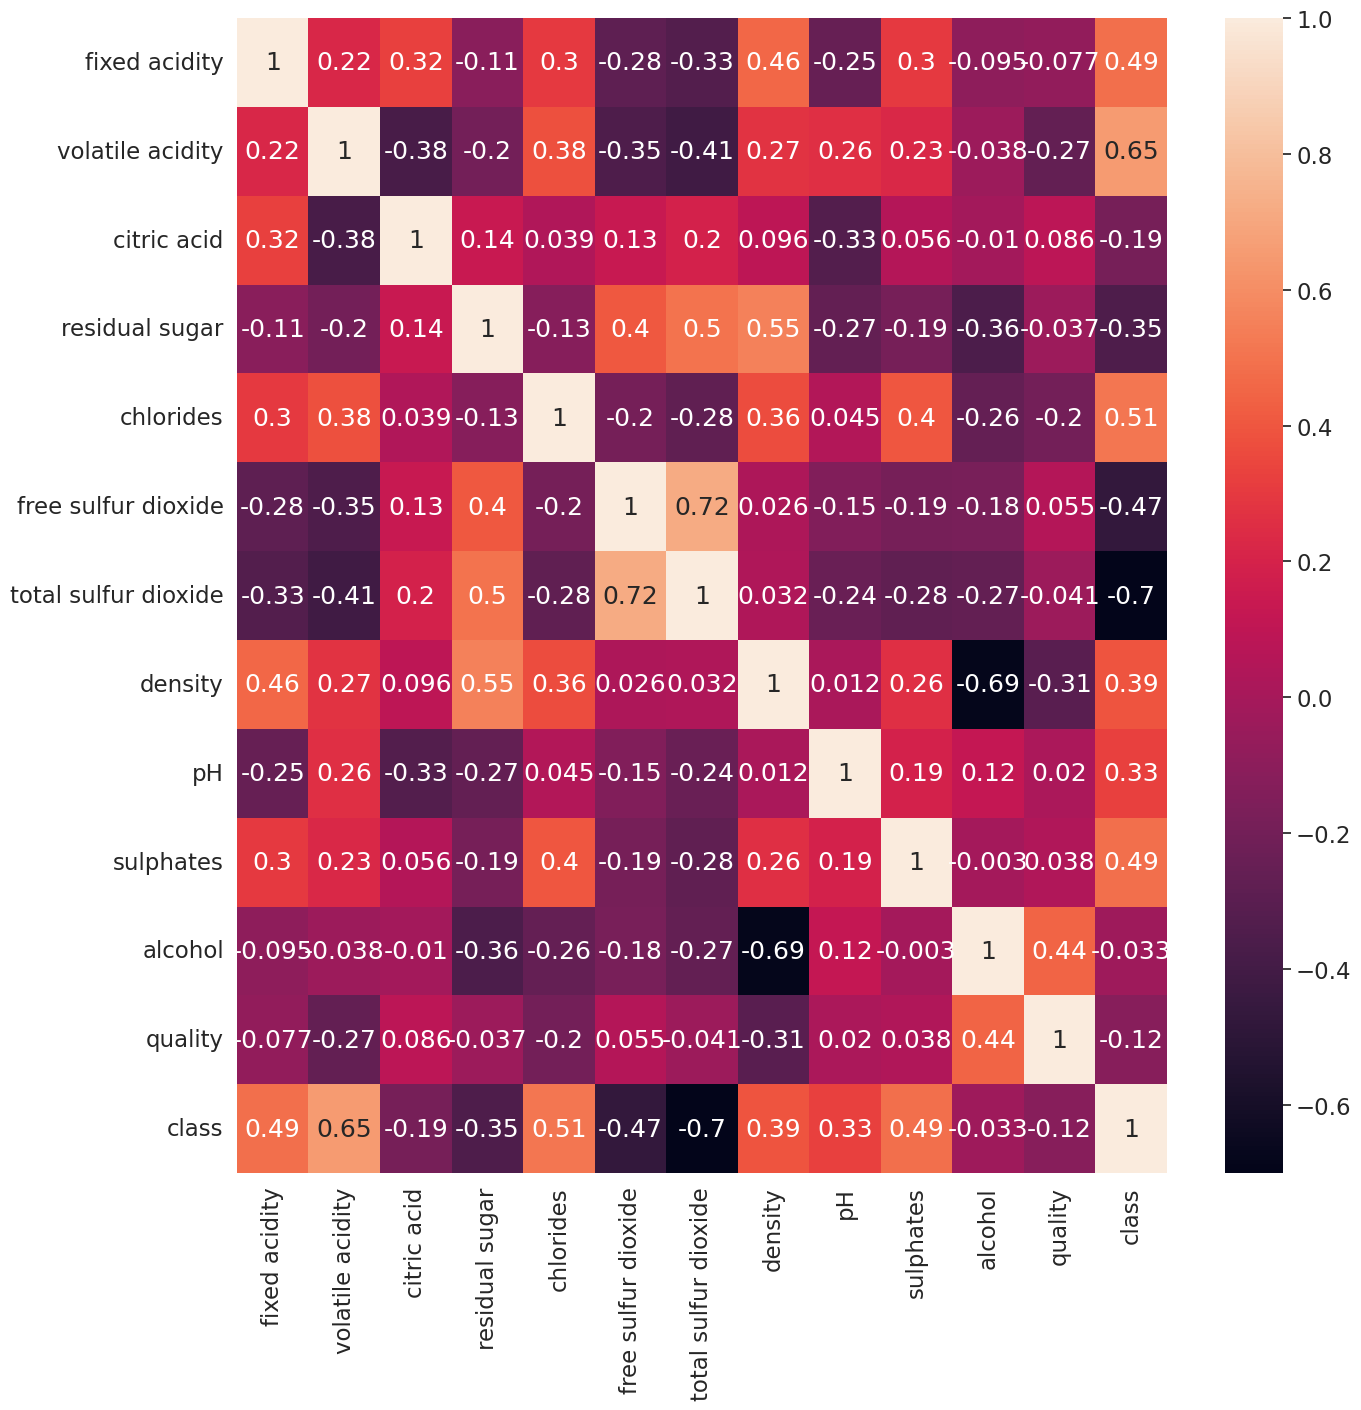

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
# 사본을 이용해서 그래프를 그림. 이때, df.corr()은 컬럼 대 컬럼으로 모든 상관계수를 구한다.
# 상관계수는 -1 ~ 1 사이의 값을 가지면서
# -1에 가까울 수록 음의 상관관계(방향 반대): 돈 쓰는 횟수 vs 통장 잔고
# 1에 가까울 수록 양의 상관관계(둘다상승): 야식 섭취횟수 vs 몸무게
# 0에 가까울수록 관계약함 보통 0.25 수준으로 거름

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 피어슨 상관관계를 통한 데이터 필터링 변수 선택 -> feature selection
# 참고로, 상관관계를 보기도 하지만, 다중공선성을 보기도 한다. (X_1와 X_2가 서로 상관이 쎄서 학습을 방해)
# 이걸로 변수를 선택하는 경우도 있다. (VIF > 10),, 다만, 의사결정 나무 계열들은 다중공선성에 영향이 없다.
# 그럴 땐 corr을 선택해야 한다.

x = df[['residual sugar', 'chlorides', 'density','quality']]
y = df['alcohol']

In [ ]:
x

,residual sugar,chlorides,density,quality
0,1.9,0.076,0.99780,5
1,2.6,0.098,0.99680,5
2,2.3,0.092,0.99700,5
3,1.9,0.075,0.99800,6
4,1.9,0.076,0.99780,5
...,...,...,...,...
6492,1.6,0.039,0.99114,6
6493,8.0,0.047,0.99490,5
6494,1.2,0.041,0.99254,6
6495,1.1,0.022,0.98869,7


# 5. 결측치 개수 확인

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [ ]:
# 모델에서 사용할 feature들이 연산에 오류가 안생기도록 null 값 확인
# True = 1, False = 0으로 세로 방향으로 sum 하게 됨
x.isnull().sum()

residual sugar    0
chlorides         0
density           0
quality           0
dtype: int64

In [ ]:
df_avg = df.fillna(0).values.mean()

In [ ]:
# x의 모든 컬럼에 대해서 모든 컬럼의 mean 값으로 각각 채워넣고 inplace로 실제 채워진 걸 반영
x.fillna(x.mean(), inplace=True) #0으로 채우는 건 x.fillna(0, inplace=True)

# 한개의 컬럼만 채울 경우에
# x['residual sugar'].fillna(X['residual sugar'].mean(), inplace = True)

# 6. train vaild split 8:2


*   test 본질은 다름
*   train test 이름 잘못지음



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_valid.shape:', X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (5197, 4)
y_train.shape: (5197,)
X_valid.shape: (1300, 4)
y_valid.shape: (1300,)


# 7. 리스케일링 Robust, train fit trans, valid trans

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train) #X_train 데이터에서 rs가 학습한 다음에 곧바로 변형해서
                                              # 데이터를 반환
X_valid_scaled = scaler.transform(X_valid)

# 8. 모델링 decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

# 9. validation set으로 MSE 구하기

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = dt.predict(X_valid_scaled)
mse = mean_squared_error(y_valid, y_pred)
print('valid mean square error:', mse)

r2 = r2_score(y_valid, y_pred)
print("valid r2 score:", r2)

valid mean square error: 0.6283001175587085
valid r2 score: 0.5618448783555758
